In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def Sin2p(x):
    return np.sin(2 * np.pi * x)

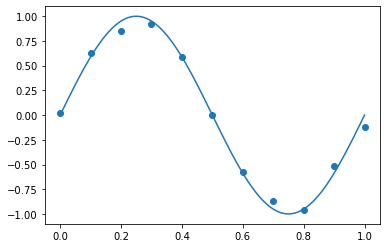

In [8]:
ContiN_x = np.linspace(0, 1, 100)
ContiN_y = Sin2p(ContiN_x)
plt.plot(ContiN_x, ContiN_y)           #绘制sin(2*pi*x)

n = 11  # n 代表在曲线上选取的点的个数

x = np.linspace(0, 1, n)
y_label = Sin2p(x).reshape(n, 1) + np.random.normal(0, 0.1, size = (n, 1)) #均匀选取n个点并加上高斯噪音
plt.scatter(x, y_label)

In [9]:
def Expand(x, m):#扩展x，生成[1, x, x^2, x^3, ……, x^m]^T，m为多项式的最高次数
    return np.array([np.power(x, i) for i in range(0, m+1)], dtype = np.float64)


In [10]:
def Create_Matrix(x, m):#将11个点的数据生成一个 n * (m + 1)维的矩阵
    X_data =[]
    for x_num in x:
        X_data.append(Expand(x_num, m))
    return np.array(X_data)    

In [16]:
def Lstsq(data_x, label_y, m, regu = 0): #最小二乘法， regu为正则项前系数
    data_x = np.matrix(data_x)
    label_y = np.matrix(label_y)
    if regu == 0:
        return data_x.I @ (data_x.T).I @ data_x.T @ label_y
    else:
        return (regu * np.identity(m + 1) + (data_x.T @ data_x)).I @ data_x.T @ label_y

#reate_Matrix(x, m).shape

In [17]:
def polynormial(x, w, m):   #给定x, 计算多项式函数f(x)的值
    X = Expand(x, m)
    return (X * w).sum()

In [125]:
def Plot(w, m, s, flg = True):  #可视化拟合的曲线， flg为是否画出sin(2pi*x)的曲线
    Y = [polynormial(xx, w, m) for xx in ContiN_x]
    plt.title(s)
    plt.plot(ContiN_x, Y)
    plt.scatter(x, y_label, c = "g")
    if flg == True:
        plt.plot(ContiN_x, ContiN_y, c = "r")

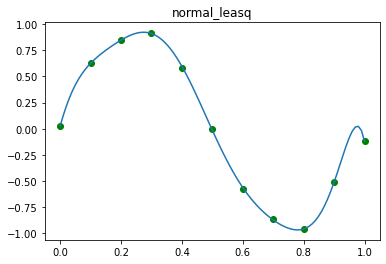

In [132]:
def Solve1(m, flg = False, s = "normal_leasq"): #使用普通最小二乘法解决
    data_x = Create_Matrix(x, m)
    w = Lstsq(data_x, y_label, m)    
    Plot(w, m, s, flg)

Solve1(9)#设置m

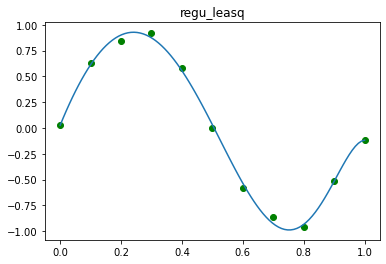

In [137]:
def Solve2(m, lbd, flg = False, s = "regu_leasq"):#使用带正则项的最小二乘法解决， lbd为正则项前系数
    data_x = Create_Matrix(x, m)
    w = Lstsq(data_x, y_label, m, lbd)
    Plot(w, m, s, flg)

Solve2(9, 0.00001)

In [112]:
def Loss(w, m):
    return sum([(polynormial(x[i], w, m) - y_label[i].item())**2 for i in range(n)])

epoch: 1000
Loss:0.9196197496758802
epoch: 2000
Loss:0.7758415207635062
epoch: 3000
Loss:0.6825043129963582
epoch: 4000
Loss:0.6032070015264654
epoch: 5000
Loss:0.5335527888884982
epoch: 6000
Loss:0.47215572205054995
epoch: 7000
Loss:0.41801768776379794
epoch: 8000
Loss:0.37027869350491116
epoch: 9000
Loss:0.32818220773176204
epoch: 10000
Loss:0.2910612822664271
epoch: 11000
Loss:0.25832781546110123
epoch: 12000
Loss:0.2294632193695437
epoch: 13000
Loss:0.20401020217366592
epoch: 14000
Loss:0.18156552300133957
epoch: 15000
Loss:0.1617736032077504
epoch: 16000
Loss:0.14432089279877774
epoch: 17000
Loss:0.12893090273216393
epoch: 18000
Loss:0.11535982439038718
epoch: 19000
Loss:0.10339266682269657
epoch: 20000
Loss:0.09283985055707672
epoch: 21000
Loss:0.08353420401653155
epoch: 22000
Loss:0.07532831495268391
epoch: 23000
Loss:0.06809219493440294
epoch: 24000
Loss:0.061711219888991156
epoch: 25000
Loss:0.056084314067110695
epoch: 26000
Loss:0.05112234865925561
epoch: 27000
Loss:0.0467467

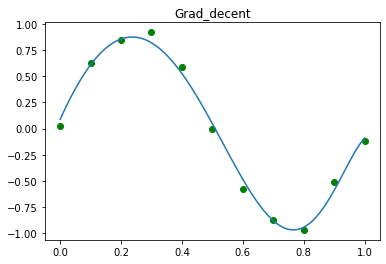

In [138]:
def Grad_decent(data_x, label_y, epoch, m, lr = 0.03):  #梯度下降法， epoch为训练次数（世代）， lr学习率
    data_x = np.matrix(data_x)
    label_y = np.matrix(label_y)
    w = np.matrix(np.random.normal(0, 0.1, size = (m + 1, 1)))
    for i in range(epoch):
        w -= lr * (data_x.T @ data_x @ w - data_x.T @ label_y)
        if (i + 1) % 1000 == 0:
            print(f"epoch: {i + 1}\nLoss:{Loss(w, m)}") #每1000个epoch输出一下Lossz值，方便调节学习率
    return w

def Solve3(m, epoch = 30000, lr = 0.03, flg = False, s = "Grad_decent"): #使用梯度下降法解决
    data_x = Create_Matrix(x, m)
    w = Grad_decent(data_x, y_label, epoch, m, lr)
    Plot(w, m, s, flg)
    
Solve3(9)

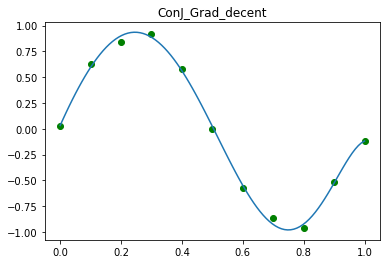

In [139]:
def ConJ_Gd(data_x, label_y, m):#共轭梯度法主体
    data_x = np.matrix(data_x)
    label_y = np.matrix(label_y)
    A = data_x.T @ data_x
    b = data_x.T @ label_y
    r = -b
    d = np.zeros((m + 1, 1), dtype = np.float64)
    w = np.zeros((m + 1, 1), dtype = np.float64)
    for i in range(m + 1):
        fm = r.T @ r
        r = A @ w - b
        d = -r + ((r.T @ r) / fm).item() * d
        alpha = -1 * (d.T @ r) / (d.T @ A @ d)
        w = w + alpha.item() * d
    return w

def Solve4(m, flg = False, s = "ConJ_Grad_decent"):#使用共轭梯度法解决
    data_x = Create_Matrix(x, m)
    w = ConJ_Gd(data_x, y_label, m)
    Plot(w, m, s, flg)

Solve4(9)